<a href="https://colab.research.google.com/github/FucsikovaTereza/Research_Project/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
url_front = 'https://github.com/FucsikovaTereza/Research_Project/raw/main/data_front.npz'
url_front_small = 'https://github.com/FucsikovaTereza/Research_Project/raw/main/data_front_small.npz'
url_side = 'https://github.com/FucsikovaTereza/Research_Project/raw/main/data_side.npz'
!wget -O data_front.npz {url_front}
!wget -O data_front_small.npz {url_front_small}
!wget -O data_side.npz {url_side}
!pip install tqdm
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd

--2024-07-16 09:38:53--  https://github.com/FucsikovaTereza/Research_Project/raw/main/data_front.npz
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FucsikovaTereza/Research_Project/main/data_front.npz [following]
--2024-07-16 09:38:54--  https://raw.githubusercontent.com/FucsikovaTereza/Research_Project/main/data_front.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2709724 (2.6M) [application/octet-stream]
Saving to: ‘data_front.npz’

data_front.npz      100%[===================>]   2.58M  --.-KB/s    in 0.08s   

2024-07-16 09:38:54 (33.8 MB/s) - ‘data_front.npz’ saved [2709724/2709724]



# Dataset Front

In [88]:
data_front = np.load('data_front.npz')
X = data_front['matrix']
y = data_front['labels']

print("Features size:", X.shape)
print("Labels size:", y.shape)

Features size: (56160, 12)
Labels size: (56160,)


In [89]:
# Split the data into training+validation and test sets (80% train+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (33696, 12)
Validation set size: (11232, 12)
Test set size: (11232, 12)


100%|██████████| 50/50 [02:38<00:00,  3.17s/it]


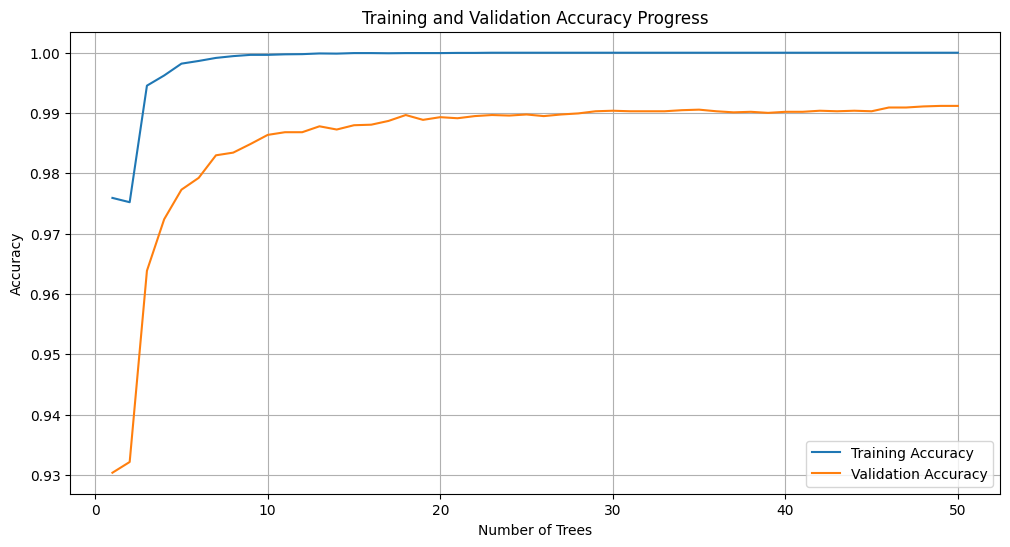

Validation Accuracy: 0.9911858974358975
Test Accuracy: 0.9883368945868946


In [90]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

# Lists to store accuracies
train_accuracies = []
val_accuracies = []

# Train the model with progress bar and track accuracies
for i in tqdm(range(1, rf_model.n_estimators + 1)):
    rf_model.set_params(n_estimators=i)
    rf_model.fit(X_train, y_train)

    # Calculate training accuracy
    y_train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate validation accuracy
    y_val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Progress')
plt.legend()
plt.grid(True)
plt.show()

print("Validation Accuracy:", val_accuracy)

# Predict on the test set
y_test_pred = rf_model.predict(X_test)
# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Feature ranking:
1. feature 1 (0.12141323813454023) - cervical_spine_angle
2. feature 10 (0.11527907463632805) - Pitch
3. feature 8 (0.1087395012617183) - eye_ear_dist (Yaw)
4. feature 0 (0.08873431159493236) - shoulders_inclination
5. feature 2 (0.08307038618422276) - right_shoulder_world Z
6. feature 9 (0.08221337834260985) - Roll
7. feature 11 (0.07636641123200777) - Yaw
8. feature 3 (0.07513664058299159) - left_shoulder_world Z
9. feature 5 (0.0746483616717832) - left_eye_outer_world Z
10. feature 4 (0.06225624517204968) - right_eye_outer_world Z
11. feature 7 (0.05667999873066099) - left_wrist_world Z
12. feature 6 (0.05546245245615538) - right_wrist_world Z


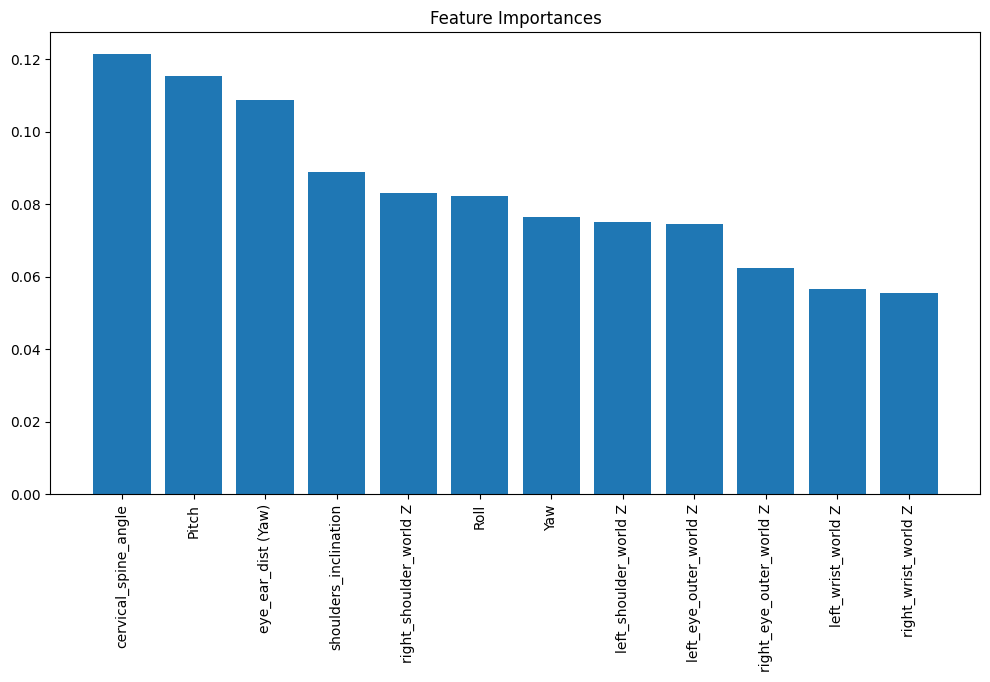

In [91]:
# Define the feature names
feature_names = [
    "shoulders_inclination", "cervical_spine_angle", "right_shoulder_world Z",
    "left_shoulder_world Z", "right_eye_outer_world Z", "left_eye_outer_world Z",
    "right_wrist_world Z", "left_wrist_world Z", "eye_ear_dist (Yaw)",
    "Roll", "Pitch", "Yaw"
]

# Compute feature importances
feature_importances = rf_model.feature_importances_

# Sort the features by importance
indices = np.argsort(feature_importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({feature_importances[indices[f]]}) - {feature_names[indices[f]]}")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature ranking for class 'Sitting upright':
1. feature 1 (0.13166679695856046) - cervical_spine_angle
2. feature 10 (0.12278480487147184) - Pitch
3. feature 8 (0.11914537384782603) - eye_ear_dist (Yaw)
4. feature 5 (0.1037751477451466) - left_eye_outer_world Z
5. feature 11 (0.08973948775342022) - Yaw
6. feature 0 (0.08687840143674054) - shoulders_inclination
7. feature 9 (0.08058012637034469) - Roll
8. feature 4 (0.0787515204762448) - right_eye_outer_world Z
9. feature 3 (0.07718080084802996) - left_shoulder_world Z
10. feature 2 (0.06916023430127692) - right_shoulder_world Z
11. feature 7 (0.020962809592930176) - left_wrist_world Z
12. feature 6 (0.019374495798007735) - right_wrist_world Z


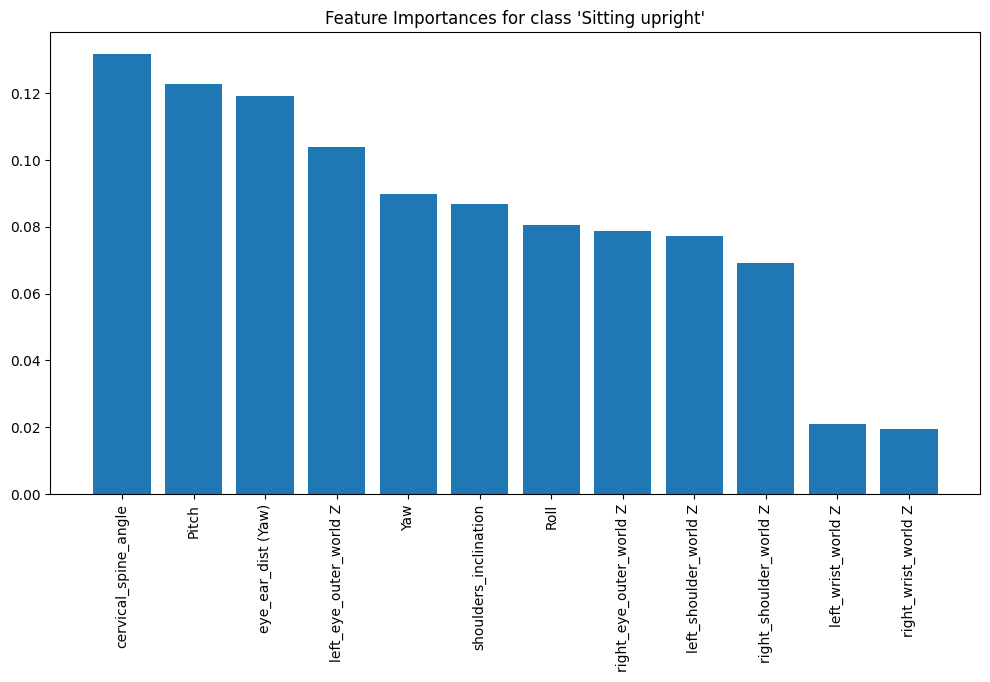

Feature ranking for class 'Crossing legs (left leg over right)':
1. feature 3 (0.13312629679739874) - left_shoulder_world Z
2. feature 10 (0.12909314719004547) - Pitch
3. feature 8 (0.12320251979912661) - eye_ear_dist (Yaw)
4. feature 11 (0.11983479718771811) - Yaw
5. feature 1 (0.09500088750409068) - cervical_spine_angle
6. feature 0 (0.08766251523834216) - shoulders_inclination
7. feature 9 (0.07694608155698432) - Roll
8. feature 2 (0.0766120705240065) - right_shoulder_world Z
9. feature 5 (0.06926614331885718) - left_eye_outer_world Z
10. feature 4 (0.06827453954555349) - right_eye_outer_world Z
11. feature 7 (0.01105870166975854) - left_wrist_world Z
12. feature 6 (0.009922299668118244) - right_wrist_world Z


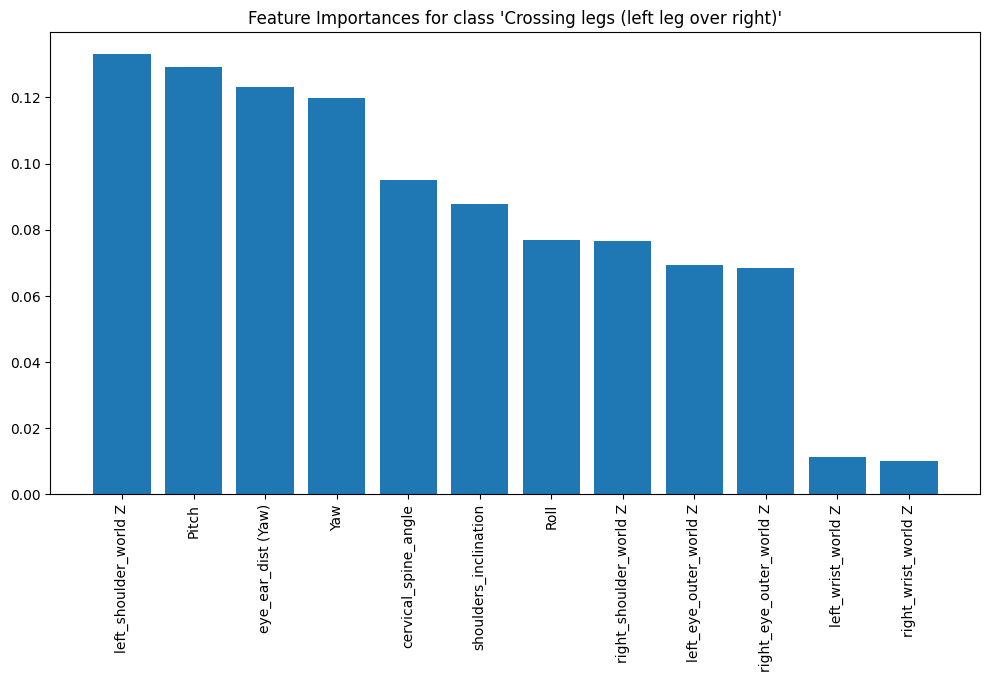

Feature ranking for class 'Crossing legs (right leg over left)':
1. feature 8 (0.1295302472559471) - eye_ear_dist (Yaw)
2. feature 9 (0.12256254134117847) - Roll
3. feature 10 (0.11440264509500825) - Pitch
4. feature 1 (0.10930022215442987) - cervical_spine_angle
5. feature 2 (0.09519337111862124) - right_shoulder_world Z
6. feature 11 (0.08705341119085076) - Yaw
7. feature 3 (0.07874091472680952) - left_shoulder_world Z
8. feature 4 (0.07577194671507083) - right_eye_outer_world Z
9. feature 0 (0.07061705477861449) - shoulders_inclination
10. feature 5 (0.07007972525044416) - left_eye_outer_world Z
11. feature 7 (0.027052113523211636) - left_wrist_world Z
12. feature 6 (0.01969580684981359) - right_wrist_world Z


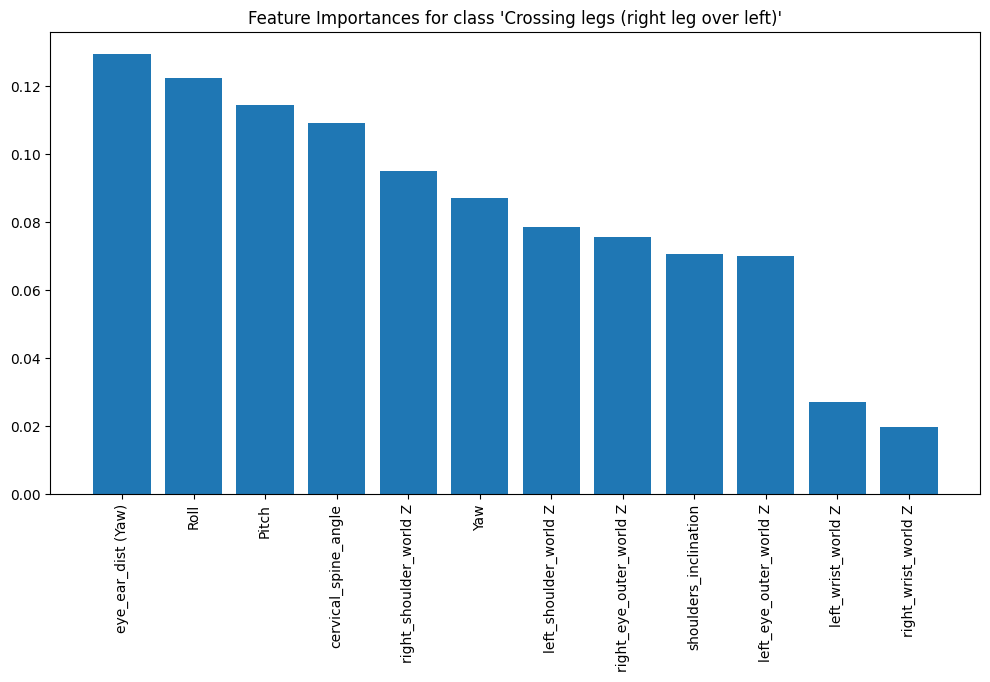

Feature ranking for class 'Leaning on the left hand':
1. feature 7 (0.252952043701168) - left_wrist_world Z
2. feature 1 (0.2055651001613346) - cervical_spine_angle
3. feature 10 (0.10078196324654766) - Pitch
4. feature 8 (0.06954919779121953) - eye_ear_dist (Yaw)
5. feature 9 (0.06323405842626258) - Roll
6. feature 0 (0.054771166363786865) - shoulders_inclination
7. feature 4 (0.04842391649818701) - right_eye_outer_world Z
8. feature 2 (0.048284487872693654) - right_shoulder_world Z
9. feature 5 (0.045555056413707565) - left_eye_outer_world Z
10. feature 11 (0.040813502860169174) - Yaw
11. feature 6 (0.03571345275596537) - right_wrist_world Z
12. feature 3 (0.03435605390895795) - left_shoulder_world Z


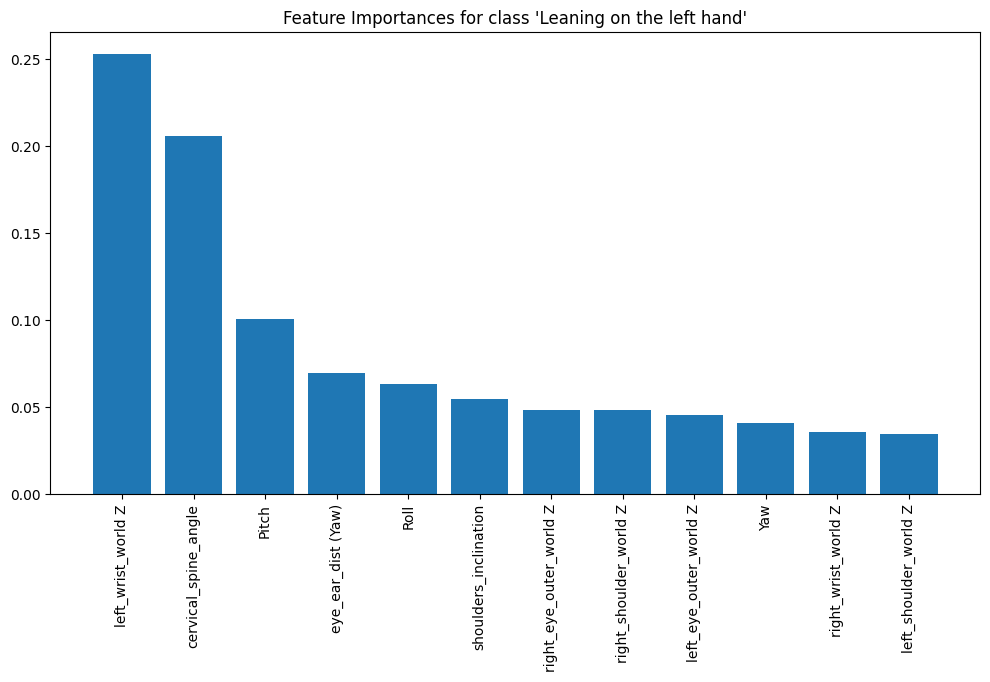

Feature ranking for class 'Leaning on the right hand':
1. feature 6 (0.24225620942613796) - right_wrist_world Z
2. feature 2 (0.14050271377235274) - right_shoulder_world Z
3. feature 9 (0.11524481781720185) - Roll
4. feature 1 (0.10201028451970398) - cervical_spine_angle
5. feature 10 (0.07827145562853746) - Pitch
6. feature 5 (0.06067923811167088) - left_eye_outer_world Z
7. feature 4 (0.05868469154671126) - right_eye_outer_world Z
8. feature 3 (0.045891467689618395) - left_shoulder_world Z
9. feature 0 (0.04372003587337102) - shoulders_inclination
10. feature 8 (0.04308236056489142) - eye_ear_dist (Yaw)
11. feature 7 (0.04075026712961939) - left_wrist_world Z
12. feature 11 (0.028906457920183672) - Yaw


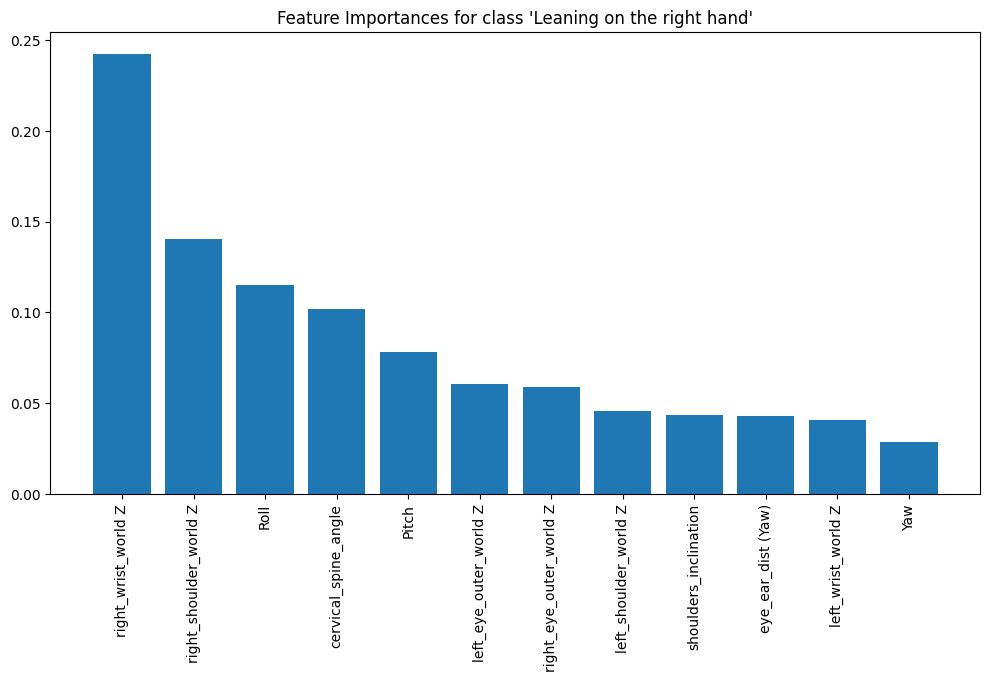

Feature ranking for class 'Slouching down in the chair':
1. feature 8 (0.18575262493856168) - eye_ear_dist (Yaw)
2. feature 9 (0.11617294207826513) - Roll
3. feature 7 (0.10146171595061325) - left_wrist_world Z
4. feature 1 (0.082005400557684) - cervical_spine_angle
5. feature 5 (0.07365798019814859) - left_eye_outer_world Z
6. feature 6 (0.07260930370268594) - right_wrist_world Z
7. feature 4 (0.07257601888438248) - right_eye_outer_world Z
8. feature 10 (0.07133717758748157) - Pitch
9. feature 2 (0.06836341696159196) - right_shoulder_world Z
10. feature 3 (0.0569680086768928) - left_shoulder_world Z
11. feature 0 (0.05525875323755233) - shoulders_inclination
12. feature 11 (0.04383665722614027) - Yaw


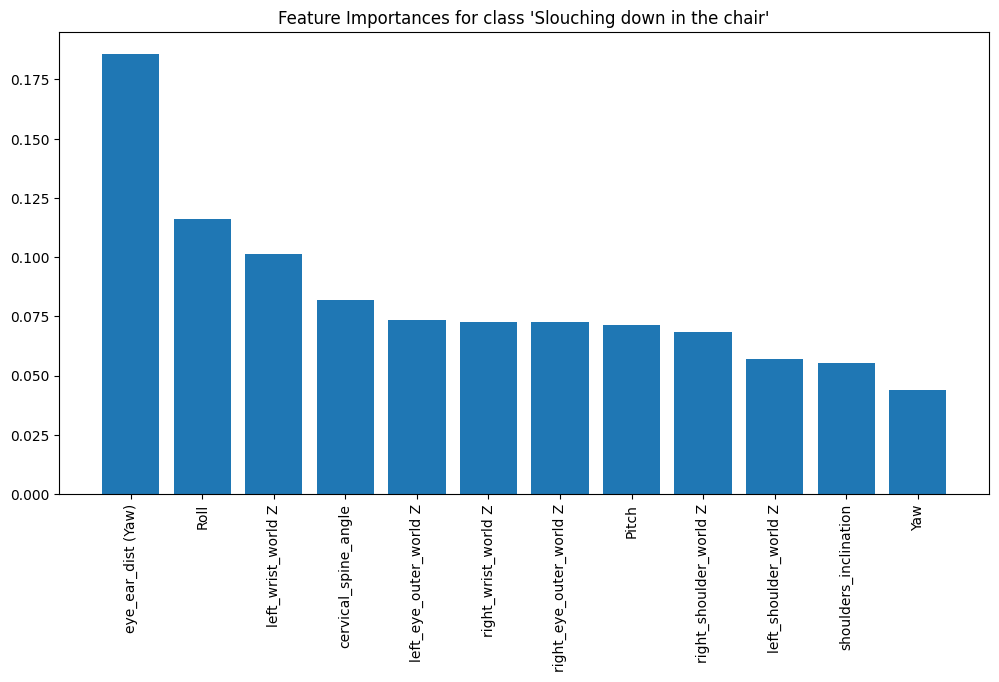

Feature ranking for class 'Extending the head forward':
1. feature 10 (0.13598026183882514) - Pitch
2. feature 11 (0.13505932078689253) - Yaw
3. feature 8 (0.13231634164900005) - eye_ear_dist (Yaw)
4. feature 3 (0.11651678660794643) - left_shoulder_world Z
5. feature 9 (0.08696012237786716) - Roll
6. feature 1 (0.08106760301375152) - cervical_spine_angle
7. feature 2 (0.07022709157049294) - right_shoulder_world Z
8. feature 0 (0.0686461348623776) - shoulders_inclination
9. feature 5 (0.06714965535205068) - left_eye_outer_world Z
10. feature 4 (0.06289951507932728) - right_eye_outer_world Z
11. feature 6 (0.023780797079585525) - right_wrist_world Z
12. feature 7 (0.01939636978188335) - left_wrist_world Z


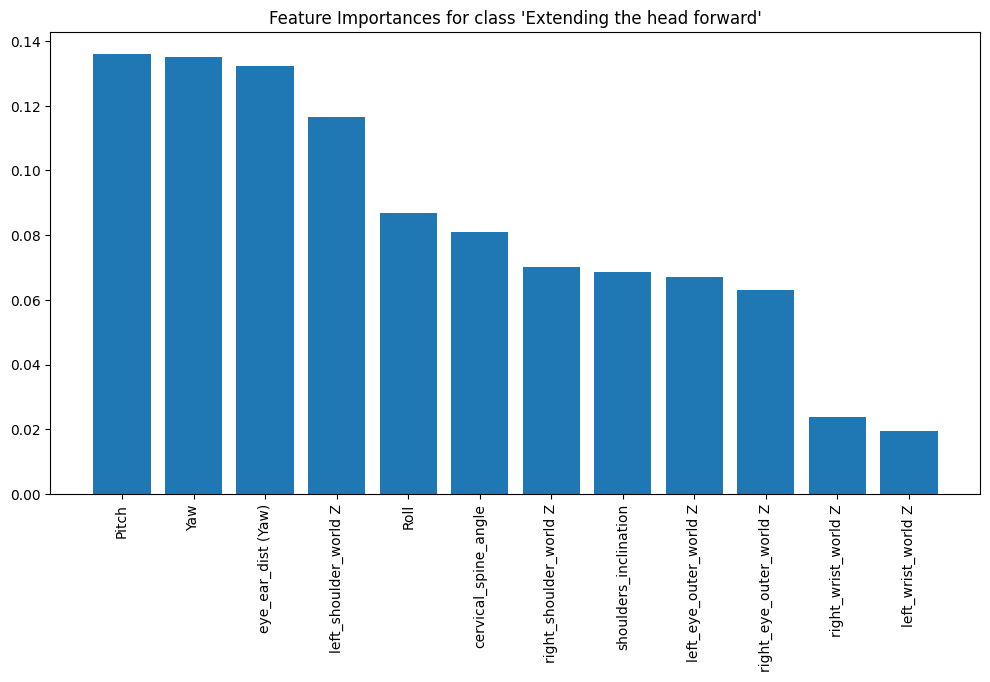

Feature ranking for class 'Slouching':
1. feature 2 (0.21996046715572565) - right_shoulder_world Z
2. feature 8 (0.11788058318779893) - eye_ear_dist (Yaw)
3. feature 1 (0.09169339462905525) - cervical_spine_angle
4. feature 11 (0.08460163012399421) - Yaw
5. feature 5 (0.08299234255720635) - left_eye_outer_world Z
6. feature 9 (0.07553301517300301) - Roll
7. feature 10 (0.06915895139157854) - Pitch
8. feature 4 (0.06374923363088067) - right_eye_outer_world Z
9. feature 7 (0.06096864158549201) - left_wrist_world Z
10. feature 0 (0.0597749028903607) - shoulders_inclination
11. feature 3 (0.04483427554032478) - left_shoulder_world Z
12. feature 6 (0.028852562134579884) - right_wrist_world Z


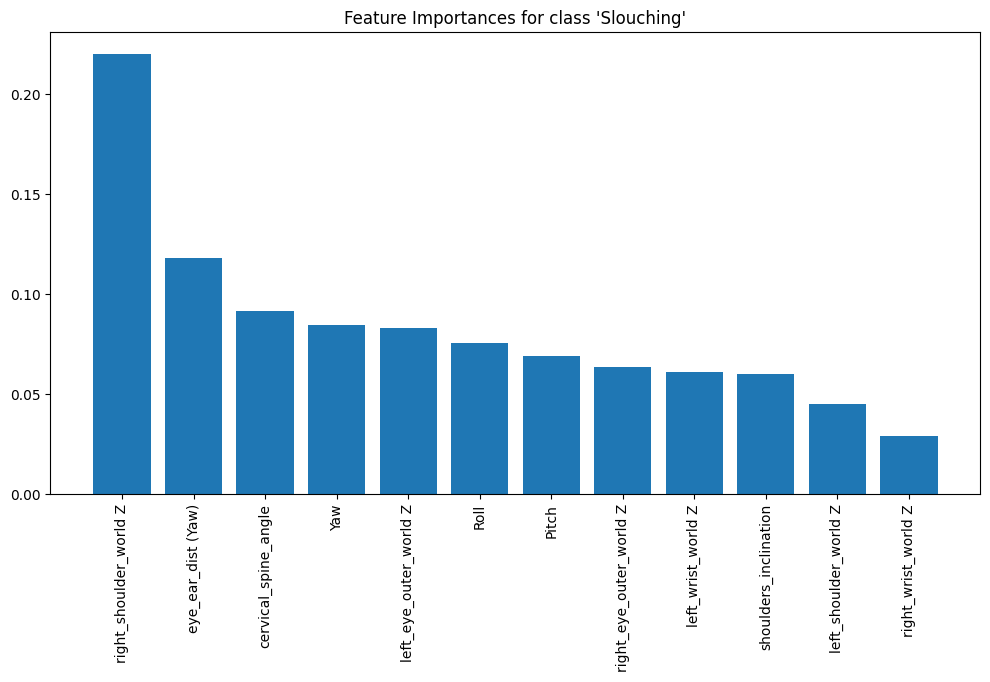

Feature ranking for class 'Writing on paper':
1. feature 10 (0.17594535720093793) - Pitch
2. feature 11 (0.1520475930823301) - Yaw
3. feature 2 (0.11612567220085378) - right_shoulder_world Z
4. feature 3 (0.09599035863708273) - left_shoulder_world Z
5. feature 8 (0.08536260689262005) - eye_ear_dist (Yaw)
6. feature 5 (0.07890914257788738) - left_eye_outer_world Z
7. feature 4 (0.07033390895601409) - right_eye_outer_world Z
8. feature 1 (0.06155659238375346) - cervical_spine_angle
9. feature 9 (0.056728743595791) - Roll
10. feature 6 (0.04727589821854288) - right_wrist_world Z
11. feature 7 (0.032742371259336676) - left_wrist_world Z
12. feature 0 (0.02698175499485015) - shoulders_inclination


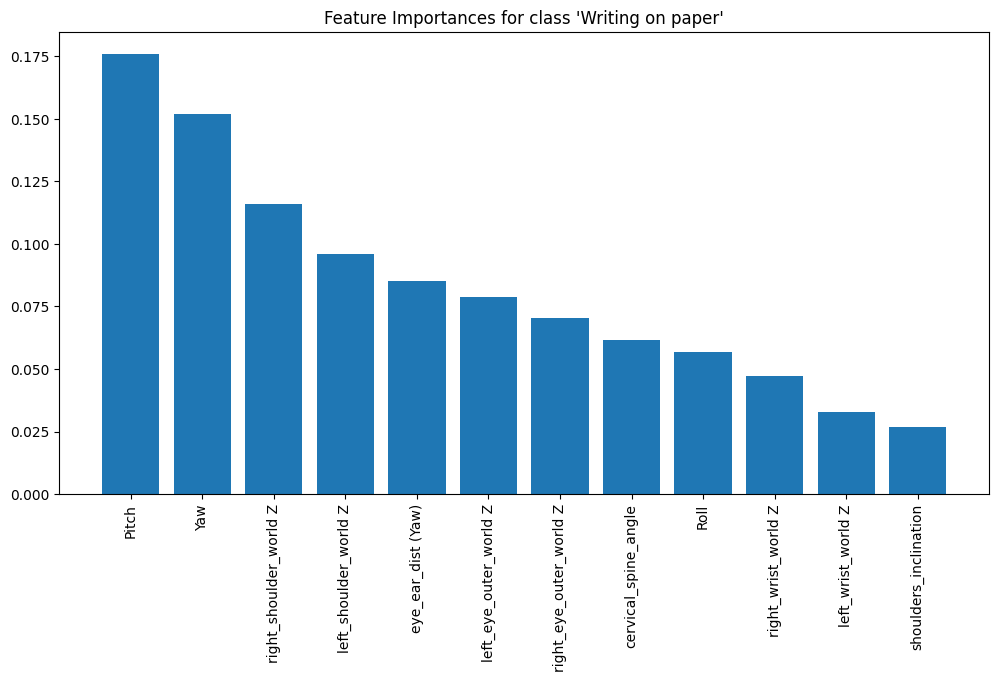

Feature ranking for class 'Sitting at the edge of the chair with legs stretched out':
1. feature 0 (0.1461641616355188) - shoulders_inclination
2. feature 1 (0.13648432589737938) - cervical_spine_angle
3. feature 9 (0.1037974625774014) - Roll
4. feature 3 (0.09661130872291658) - left_shoulder_world Z
5. feature 8 (0.09017592268159316) - eye_ear_dist (Yaw)
6. feature 2 (0.08984506711235703) - right_shoulder_world Z
7. feature 10 (0.08608603705896638) - Pitch
8. feature 5 (0.08336219688477561) - left_eye_outer_world Z
9. feature 11 (0.07082146738398203) - Yaw
10. feature 4 (0.06330813254650244) - right_eye_outer_world Z
11. feature 6 (0.021949605578261023) - right_wrist_world Z
12. feature 7 (0.01139431192034622) - left_wrist_world Z


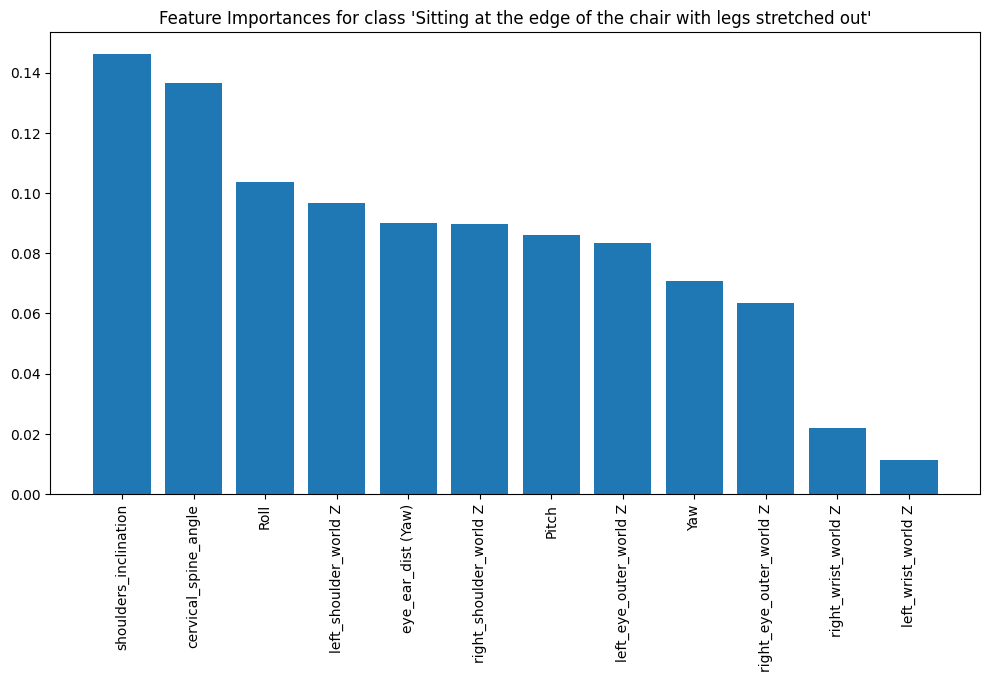

Feature ranking for class 'Sitting on left leg':
1. feature 10 (0.19022288533583664) - Pitch
2. feature 8 (0.1338036481587576) - eye_ear_dist (Yaw)
3. feature 9 (0.10522839210504736) - Roll
4. feature 1 (0.09924087825959753) - cervical_spine_angle
5. feature 11 (0.09609633028075254) - Yaw
6. feature 5 (0.07653130256776002) - left_eye_outer_world Z
7. feature 2 (0.07584568926225306) - right_shoulder_world Z
8. feature 0 (0.07358359470766182) - shoulders_inclination
9. feature 3 (0.06586063204004607) - left_shoulder_world Z
10. feature 4 (0.06067501633090965) - right_eye_outer_world Z
11. feature 7 (0.01672102755615803) - left_wrist_world Z
12. feature 6 (0.006190603395219615) - right_wrist_world Z


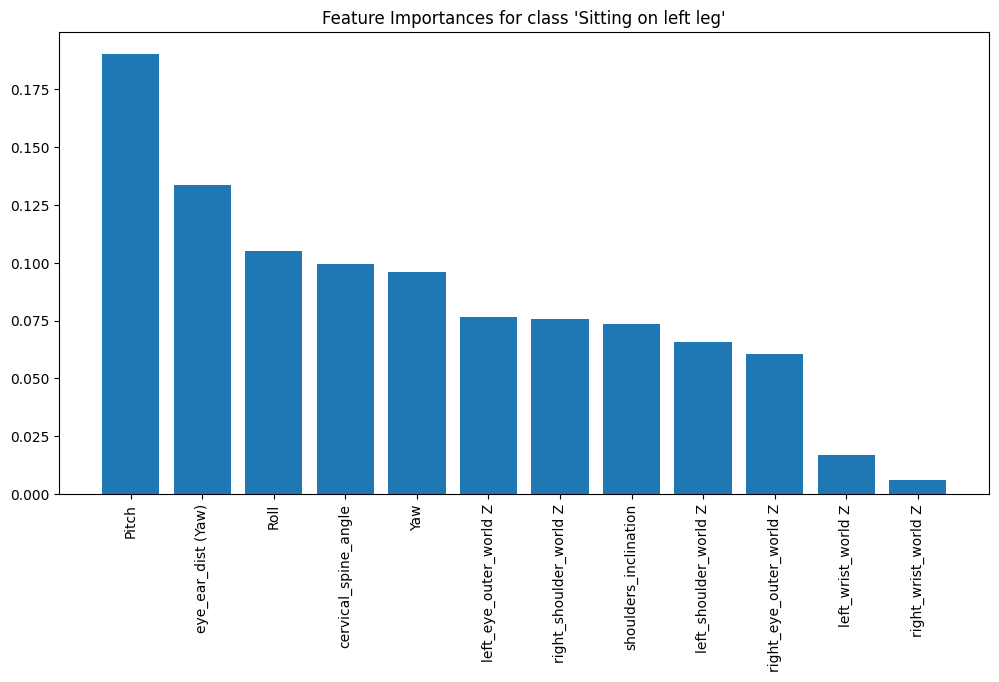

Feature ranking for class 'Sitting on right leg':
1. feature 1 (0.20368448715027226) - cervical_spine_angle
2. feature 0 (0.17378411308957695) - shoulders_inclination
3. feature 9 (0.09530998841918532) - Roll
4. feature 11 (0.09242989880323377) - Yaw
5. feature 10 (0.08905365914706305) - Pitch
6. feature 8 (0.0751247896608222) - eye_ear_dist (Yaw)
7. feature 3 (0.06388486973046185) - left_shoulder_world Z
8. feature 2 (0.06015398403576043) - right_shoulder_world Z
9. feature 5 (0.05093404614917313) - left_eye_outer_world Z
10. feature 4 (0.04631631635259153) - right_eye_outer_world Z
11. feature 7 (0.031589355091681544) - left_wrist_world Z
12. feature 6 (0.01773449237017813) - right_wrist_world Z


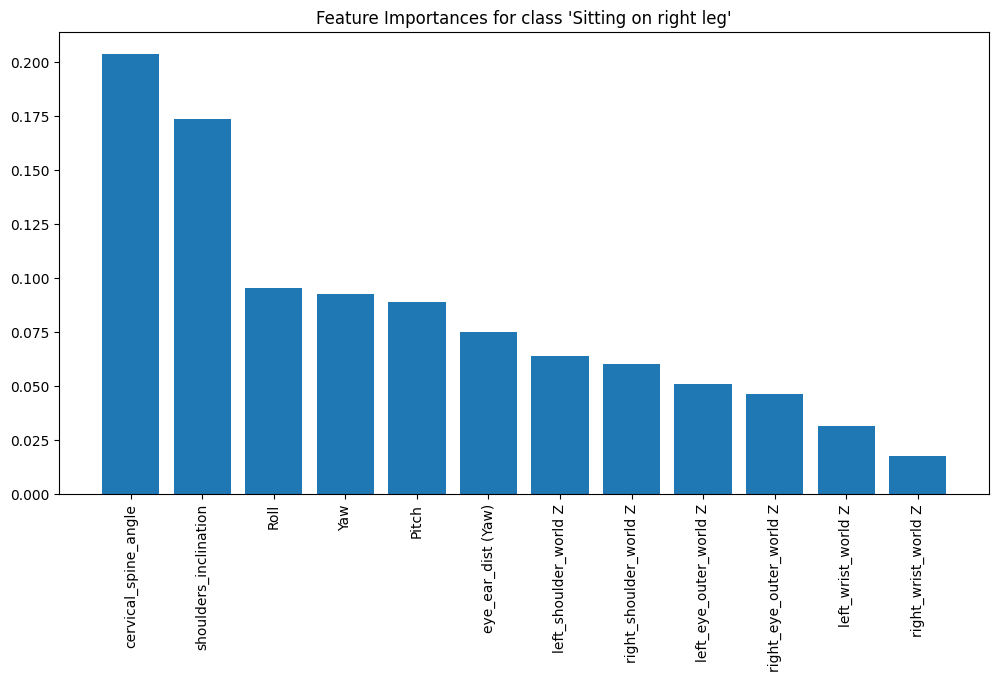

In [92]:
# Define the class names
class_names = [
    "Sitting upright",
    "Crossing legs (left leg over right)",
    "Crossing legs (right leg over left)",
    "Leaning on the left hand",
    "Leaning on the right hand",
    "Slouching down in the chair",
    "Extending the head forward",
    "Slouching",
    "Writing on paper",
    "Sitting at the edge of the chair with legs stretched out",
    "Sitting on left leg",
    "Sitting on right leg"
]

# Initialize and train the One-vs-Rest Random Forest model
ovr_model = OneVsRestClassifier(rf_model)
ovr_model.fit(X_train, y_train)

# Loop through each class and print the feature importances
for class_index, class_name in enumerate(class_names):
    specific_rf_model = ovr_model.estimators_[class_index]

    # Compute feature importances for the specific class
    feature_importances = specific_rf_model.feature_importances_

    # Sort the features by importance
    indices = np.argsort(feature_importances)[::-1]

    print(f"Feature ranking for class '{class_name}':")
    for f in range(X_train.shape[1]):
        print(f"{f + 1}. feature {indices[f]} ({feature_importances[indices[f]]}) - {feature_names[indices[f]]}")

    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances for class '{class_name}'")
    plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
    plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()

In [93]:
### Cross-Validation ###

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest model
rf_model_check = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation on the training set
val_accuracies_check = cross_val_score(rf_model_check, X_train, y_train, cv=kf, scoring='accuracy')

# Print average validation accuracy
print("Validation Accuracies for each fold:", val_accuracies_check)

# Train the final model on the entire training dataset
rf_model_check.fit(X_train, y_train)

# Evaluate the model on the test set
y_test_pred_check = rf_model_check.predict(X_test)
test_accuracy_check = accuracy_score(y_test, y_test_pred_check)

# Print test accuracy
print("Test Accuracy:", test_accuracy_check)

Validation Accuracies for each fold: [0.99050445 0.9881288  0.9881288  0.98931592 0.98857397]
Test Accuracy: 0.9898504273504274


Features size: (56160, 11)
Labels size: (56160,)
Training set size: (33696, 11)
Validation set size: (11232, 11)
Test set size: (11232, 11)


100%|██████████| 50/50 [02:22<00:00,  2.84s/it]


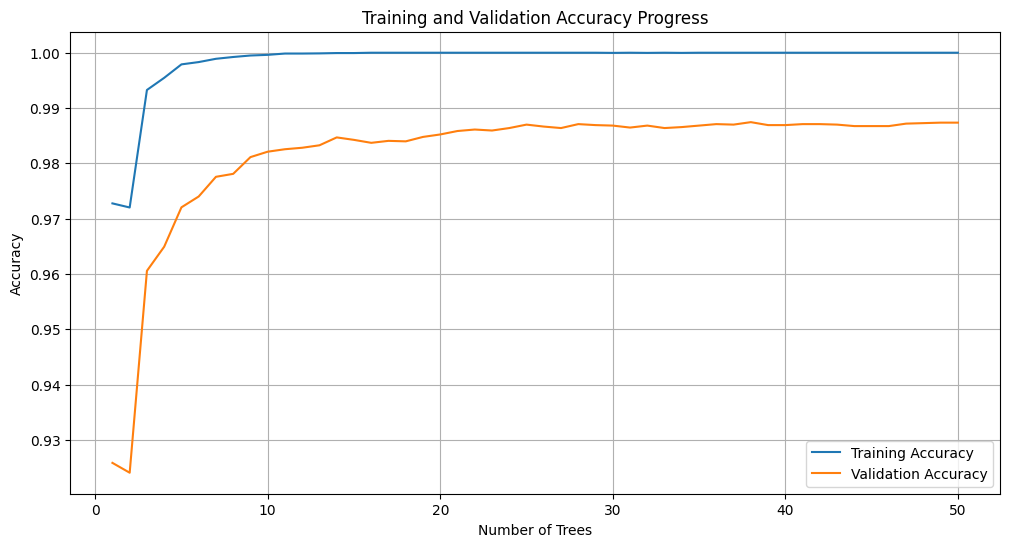

Validation Accuracy: 0.9873575498575499
Test Accuracy: 0.9854878917378918


In [94]:
data_side = np.load('data_front_small.npz')
W = data_side['matrix']
v = data_side['labels']

print("Features size:", W.shape)
print("Labels size:", v.shape)

# Split the data into training+validation and test sets (80% train+validation, 20% test)
W_train_val, W_test, v_train_val, v_test = train_test_split(W, v, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (80% train, 20% validation)
W_train, W_val, v_train, v_val = train_test_split(W_train_val, v_train_val, test_size=0.25, random_state=42)

print("Training set size:", W_train.shape)
print("Validation set size:", W_val.shape)
print("Test set size:", W_test.shape)

# Initialize the Random Forest model
rf_model_small = RandomForestClassifier(n_estimators=50, random_state=42)

# Lists to store accuracies
train_accuracies_small = []
val_accuracies_small = []

# Train the model with progress bar and track accuracies
for i in tqdm(range(1, rf_model_small.n_estimators + 1)):
    rf_model_small.set_params(n_estimators=i)
    rf_model_small.fit(W_train, v_train)

    # Calculate training accuracy
    v_train_pred = rf_model_small.predict(W_train)
    train_accuracy_small = accuracy_score(v_train, v_train_pred)
    train_accuracies_small.append(train_accuracy_small)

    # Calculate validation accuracy
    v_val_pred = rf_model_small.predict(W_val)
    val_accuracy_small = accuracy_score(v_val, v_val_pred)
    val_accuracies_small.append(val_accuracy_small)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), train_accuracies_small, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracies_small, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Progress')
plt.legend()
plt.grid(True)
plt.show()

print("Validation Accuracy:", val_accuracy_small)

# Predict on the test set
v_test_pred = rf_model_small.predict(W_test)
# Calculate test accuracy
test_accuracy_small = accuracy_score(v_test, v_test_pred)
print("Test Accuracy:", test_accuracy_small)

Feature ranking:
1. feature 1 (0.1334398582974994) - cervical_spine_angle
2. feature 9 (0.12874351425016867) - Pitch
3. feature 8 (0.10158756003873587) - Roll
4. feature 0 (0.10012784682037948) - shoulders_inclination
5. feature 2 (0.09706772038070291) - right_shoulder_world Z
6. feature 10 (0.0895699307492382) - Yaw
7. feature 3 (0.08820821321793287) - left_shoulder_world Z
8. feature 5 (0.07300593226004806) - left_eye_outer_world Z
9. feature 4 (0.06946082903946141) - right_eye_outer_world Z
10. feature 7 (0.06205692825305706) - left_wrist_world Z
11. feature 6 (0.0567316666927761) - right_wrist_world Z


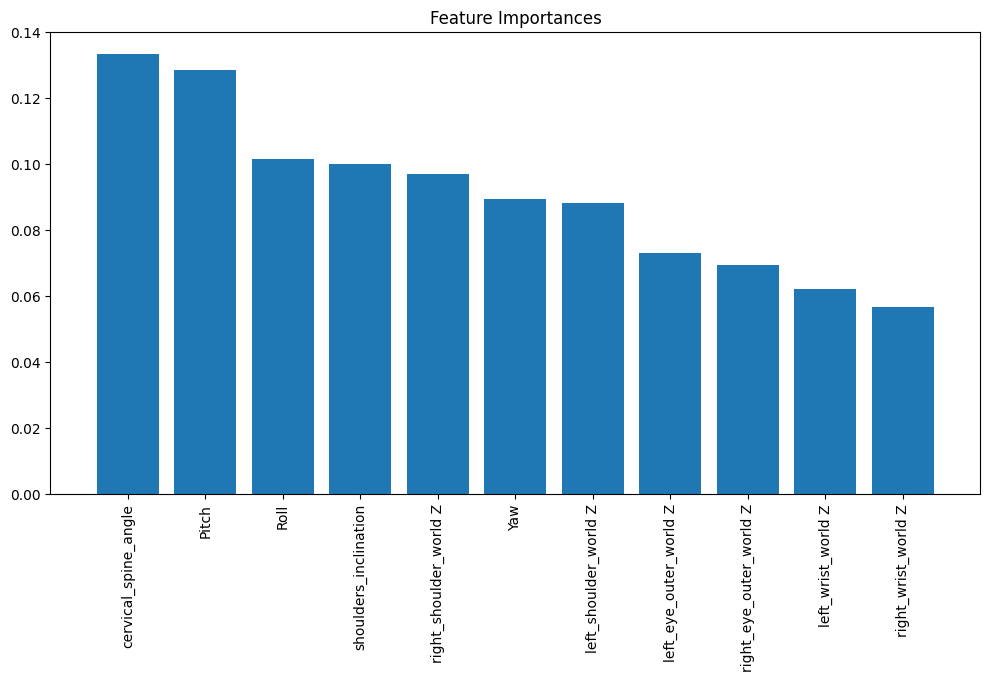

In [95]:
# Define the feature names
feature_names_small = [
    "shoulders_inclination", "cervical_spine_angle", "right_shoulder_world Z",
    "left_shoulder_world Z", "right_eye_outer_world Z", "left_eye_outer_world Z",
    "right_wrist_world Z", "left_wrist_world Z",
    "Roll", "Pitch", "Yaw"
]

# Compute feature importances
feature_importances_small = rf_model_small.feature_importances_

# Sort the features by importance
indices_small = np.argsort(feature_importances_small)[::-1]

print("Feature ranking:")
for f in range(W_train.shape[1]):
    print(f"{f + 1}. feature {indices_small[f]} ({feature_importances_small[indices_small[f]]}) - {feature_names_small[indices_small[f]]}")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(W_train.shape[1]), feature_importances_small[indices_small], align="center")
plt.xticks(range(W_train.shape[1]), [feature_names_small[i] for i in indices_small], rotation=90)
plt.xlim([-1, W_train.shape[1]])
plt.show()

# Dataset Side

Features size: (56160, 16)
Labels size: (56160,)
Training set size: (33696, 16)
Validation set size: (11232, 16)
Test set size: (11232, 16)


100%|██████████| 50/50 [02:12<00:00,  2.66s/it]


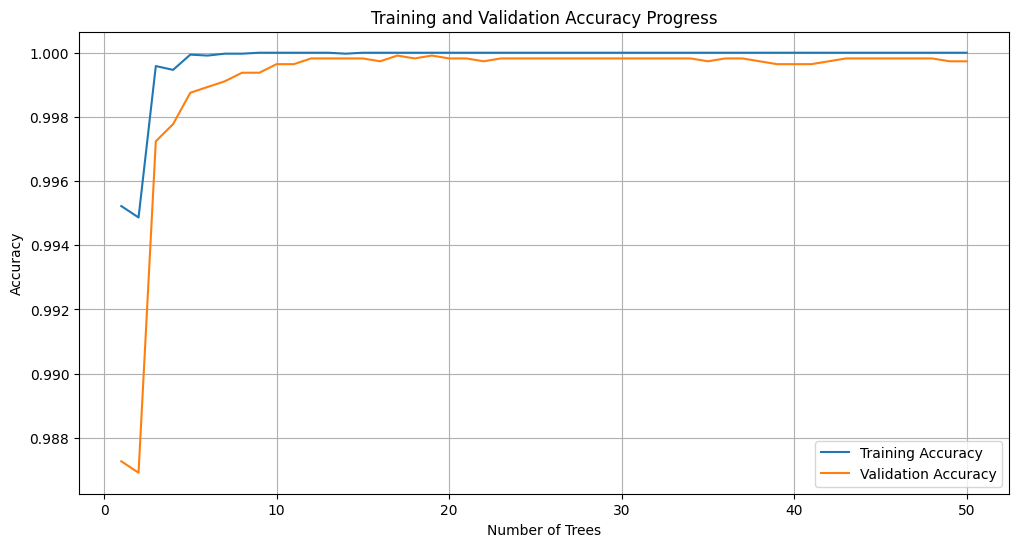

Validation Accuracy: 0.999732905982906
Test Accuracy: 0.9996438746438746


In [96]:
data_side = np.load('data_side.npz')
M = data_side['matrix']
n = data_side['labels']

print("Features size:", M.shape)
print("Labels size:", n.shape)

# Split the data into training+validation and test sets (80% train+validation, 20% test)
M_train_val, M_test, n_train_val, n_test = train_test_split(M, n, test_size=0.2, random_state=42)

# Further split the training+validation set into training and validation sets (80% train, 20% validation)
M_train, M_val, n_train, n_val = train_test_split(M_train_val, n_train_val, test_size=0.25, random_state=42)

print("Training set size:", M_train.shape)
print("Validation set size:", M_val.shape)
print("Test set size:", M_test.shape)

# Initialize the Random Forest model
rf_model_2 = RandomForestClassifier(n_estimators=50, random_state=42)

# Lists to store accuracies
train_accuracies_2 = []
val_accuracies_2 = []

# Train the model with progress bar and track accuracies
for i in tqdm(range(1, rf_model_2.n_estimators + 1)):
    rf_model_2.set_params(n_estimators=i)
    rf_model_2.fit(M_train, n_train)

    # Calculate training accuracy
    n_train_pred = rf_model_2.predict(M_train)
    train_accuracy_2 = accuracy_score(n_train, n_train_pred)
    train_accuracies_2.append(train_accuracy_2)

    # Calculate validation accuracy
    n_val_pred = rf_model_2.predict(M_val)
    val_accuracy_2 = accuracy_score(n_val, n_val_pred)
    val_accuracies_2.append(val_accuracy_2)

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), train_accuracies_2, label='Training Accuracy')
plt.plot(range(1, 51), val_accuracies_2, label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Progress')
plt.legend()
plt.grid(True)
plt.show()

print("Validation Accuracy:", val_accuracy_2)

# Predict on the test set
n_test_pred = rf_model_2.predict(M_test)
# Calculate test accuracy
test_accuracy_2 = accuracy_score(n_test, n_test_pred)
print("Test Accuracy:", test_accuracy_2)

Feature ranking:
1. feature 2 (0.16074309054309718) - hip_shoulder_dist (Slouching)
2. feature 14 (0.10206708669488432) - nose_shoulder_angle (Pitch)
3. feature 13 (0.0931953728074533) - shoulder_ear_dist (Roll)
4. feature 1 (0.0822151372152574) - torso_inclination
5. feature 10 (0.06595246764300249) - left_hip_world Z
6. feature 0 (0.06495164466869728) - neck_inclination
7. feature 8 (0.0590809049678562) - left_wrist_world Z
8. feature 9 (0.05531327481631805) - right_hip_world Z
9. feature 3 (0.05114632594857487) - right_shoulder_world Z
10. feature 12 (0.04392731020056725) - left_knee_world Z
11. feature 4 (0.04177689342026422) - left_shoulder_world Z
12. feature 15 (0.03884086287126234) - eye_ear_dist (Yaw)
13. feature 5 (0.03792466820152645) - right_eye_outer_world Z
14. feature 6 (0.035369774766720964) - left_eye_outer_world Z
15. feature 11 (0.03508450071187733) - right_knee_world Z
16. feature 7 (0.03241068452264031) - right_wrist_world Z


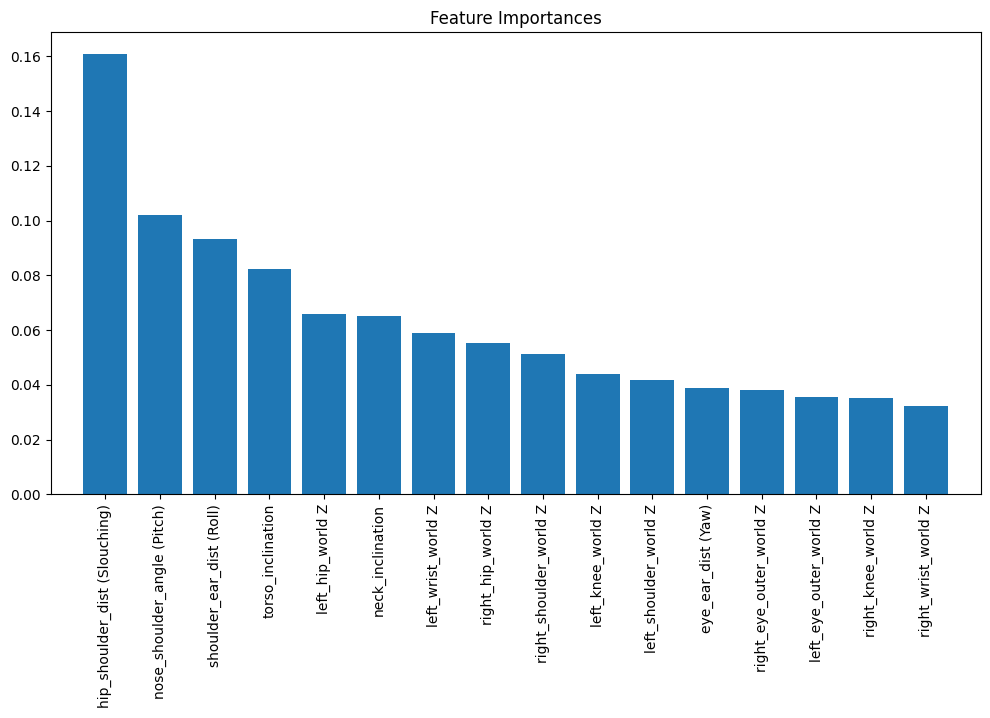

In [97]:
# Define the feature names
feature_names_2 = [
  "neck_inclination", "torso_inclination", "hip_shoulder_dist (Slouching)", "right_shoulder_world Z",
  "left_shoulder_world Z", "right_eye_outer_world Z", "left_eye_outer_world Z",
  "right_wrist_world Z", "left_wrist_world Z", "right_hip_world Z", "left_hip_world Z",
  "right_knee_world Z", "left_knee_world Z", "shoulder_ear_dist (Roll)", "nose_shoulder_angle (Pitch)", "eye_ear_dist (Yaw)"
]

# Compute feature importances
feature_importances_2 = rf_model_2.feature_importances_

# Sort the features by importance
indices_2 = np.argsort(feature_importances_2)[::-1]

print("Feature ranking:")
for f in range(M_train.shape[1]):
    print(f"{f + 1}. feature {indices_2[f]} ({feature_importances_2[indices_2[f]]}) - {feature_names_2[indices_2[f]]}")

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(M_train.shape[1]), feature_importances_2[indices_2], align="center")
plt.xticks(range(M_train.shape[1]), [feature_names_2[i] for i in indices_2], rotation=90)
plt.xlim([-1, M_train.shape[1]])
plt.show()

Feature ranking for class 'Sitting upright':
1. feature 2 (0.20339099419630352) - hip_shoulder_dist (Slouching)
2. feature 1 (0.1504493408059468) - torso_inclination
3. feature 13 (0.0845969905456016) - shoulder_ear_dist (Roll)
4. feature 3 (0.07859843851724536) - right_shoulder_world Z
5. feature 10 (0.07804161471717283) - left_hip_world Z
6. feature 9 (0.07440413545300344) - right_hip_world Z
7. feature 0 (0.054037799416933076) - neck_inclination
8. feature 5 (0.04856137857228695) - right_eye_outer_world Z
9. feature 14 (0.0446895885069205) - nose_shoulder_angle (Pitch)
10. feature 6 (0.034716084803340694) - left_eye_outer_world Z
11. feature 4 (0.029850598440768695) - left_shoulder_world Z
12. feature 12 (0.028045757687400998) - left_knee_world Z
13. feature 8 (0.02727327776132401) - left_wrist_world Z
14. feature 15 (0.026280650300652214) - eye_ear_dist (Yaw)
15. feature 7 (0.018966548245224733) - right_wrist_world Z
16. feature 11 (0.01809680202987458) - right_knee_world Z


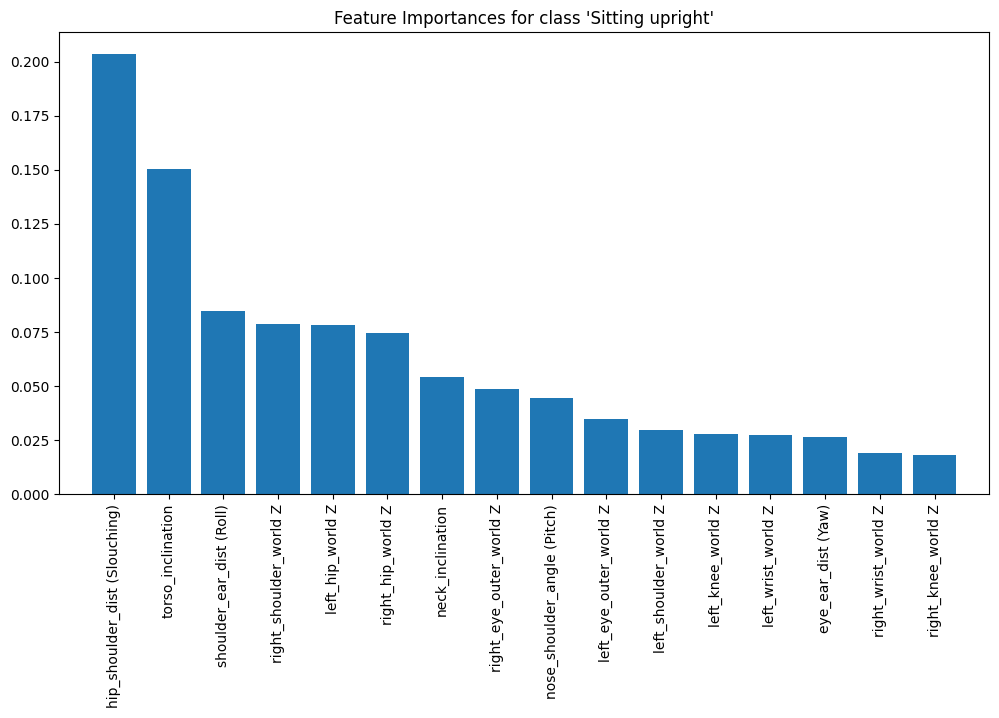

Feature ranking for class 'Crossing legs (left leg over right)':
1. feature 2 (0.14475554637054888) - hip_shoulder_dist (Slouching)
2. feature 15 (0.09356214839857925) - eye_ear_dist (Yaw)
3. feature 13 (0.09011185395458898) - shoulder_ear_dist (Roll)
4. feature 8 (0.08607465514331009) - left_wrist_world Z
5. feature 5 (0.07749377289973292) - right_eye_outer_world Z
6. feature 1 (0.07121441199266855) - torso_inclination
7. feature 4 (0.0639829065881169) - left_shoulder_world Z
8. feature 14 (0.058532477599486904) - nose_shoulder_angle (Pitch)
9. feature 3 (0.05101662611372143) - right_shoulder_world Z
10. feature 10 (0.05067227634410214) - left_hip_world Z
11. feature 12 (0.0452343932818499) - left_knee_world Z
12. feature 0 (0.04363463065059902) - neck_inclination
13. feature 6 (0.042990557307580085) - left_eye_outer_world Z
14. feature 11 (0.03691581427547852) - right_knee_world Z
15. feature 9 (0.03553570191400276) - right_hip_world Z
16. feature 7 (0.008272227165633632) - right_wri

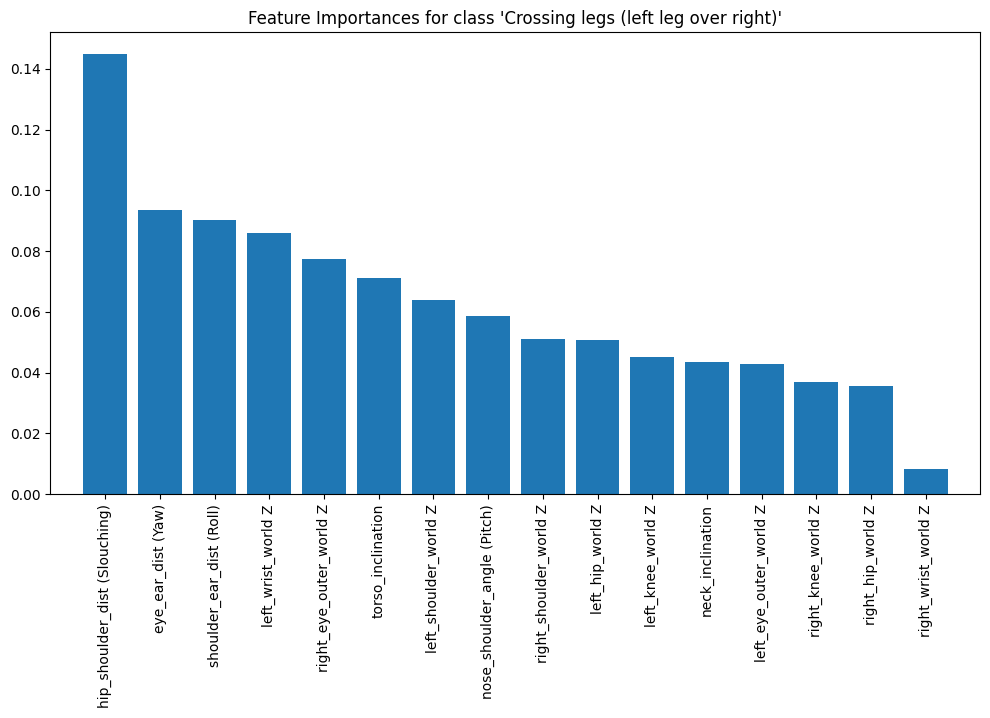

Feature ranking for class 'Crossing legs (right leg over left)':
1. feature 2 (0.15871836159073632) - hip_shoulder_dist (Slouching)
2. feature 10 (0.12202790262642006) - left_hip_world Z
3. feature 13 (0.09856497645951963) - shoulder_ear_dist (Roll)
4. feature 0 (0.09165520085786648) - neck_inclination
5. feature 9 (0.08882705899420296) - right_hip_world Z
6. feature 14 (0.0664933952642355) - nose_shoulder_angle (Pitch)
7. feature 12 (0.05853229074304799) - left_knee_world Z
8. feature 11 (0.05143085746447785) - right_knee_world Z
9. feature 1 (0.05103410938328969) - torso_inclination
10. feature 8 (0.04328260937799464) - left_wrist_world Z
11. feature 4 (0.040235971628093836) - left_shoulder_world Z
12. feature 15 (0.03489500336478631) - eye_ear_dist (Yaw)
13. feature 5 (0.02963315270627925) - right_eye_outer_world Z
14. feature 3 (0.02917881518760967) - right_shoulder_world Z
15. feature 6 (0.02369372842574033) - left_eye_outer_world Z
16. feature 7 (0.011796565925699509) - right_wri

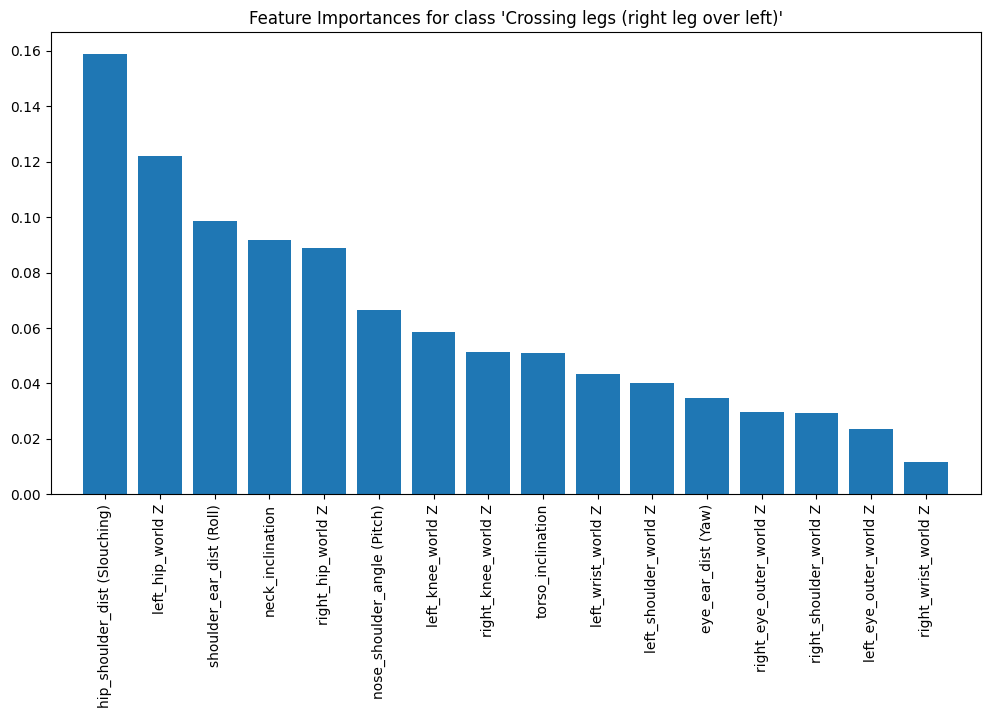

Feature ranking for class 'Leaning on the left hand':
1. feature 14 (0.112264239144565) - nose_shoulder_angle (Pitch)
2. feature 2 (0.10596926453533767) - hip_shoulder_dist (Slouching)
3. feature 13 (0.10110369130496986) - shoulder_ear_dist (Roll)
4. feature 10 (0.09430558134253335) - left_hip_world Z
5. feature 9 (0.08574534153171552) - right_hip_world Z
6. feature 15 (0.0810286229517971) - eye_ear_dist (Yaw)
7. feature 1 (0.07852053214901869) - torso_inclination
8. feature 0 (0.0604394727915948) - neck_inclination
9. feature 3 (0.05667960603001414) - right_shoulder_world Z
10. feature 6 (0.04246429366797334) - left_eye_outer_world Z
11. feature 4 (0.04217360277619931) - left_shoulder_world Z
12. feature 8 (0.038708481629958706) - left_wrist_world Z
13. feature 5 (0.03732337934440064) - right_eye_outer_world Z
14. feature 7 (0.02432160853368587) - right_wrist_world Z
15. feature 12 (0.02115252941589678) - left_knee_world Z
16. feature 11 (0.01779975285033926) - right_knee_world Z


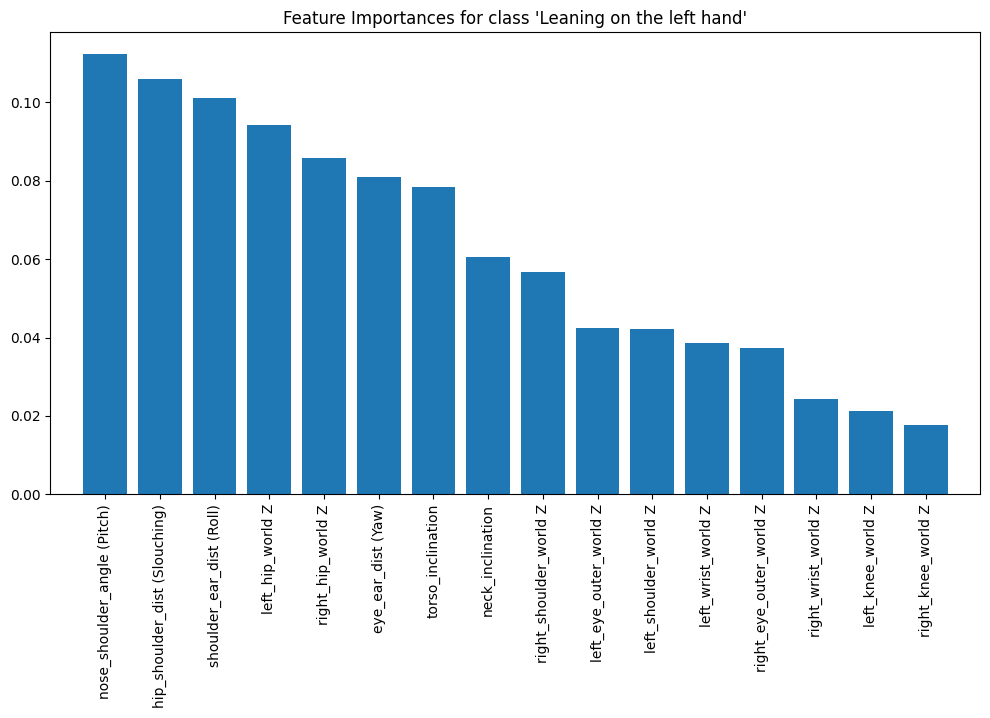

Feature ranking for class 'Leaning on the right hand':
1. feature 1 (0.16793639159976997) - torso_inclination
2. feature 7 (0.1454429516697724) - right_wrist_world Z
3. feature 2 (0.10824718604957166) - hip_shoulder_dist (Slouching)
4. feature 13 (0.08819390130883759) - shoulder_ear_dist (Roll)
5. feature 14 (0.0671602281989454) - nose_shoulder_angle (Pitch)
6. feature 5 (0.06500348647378498) - right_eye_outer_world Z
7. feature 4 (0.06478633974558246) - left_shoulder_world Z
8. feature 0 (0.06055073844182423) - neck_inclination
9. feature 8 (0.059616800705849064) - left_wrist_world Z
10. feature 3 (0.05645702664155292) - right_shoulder_world Z
11. feature 15 (0.026838450883492904) - eye_ear_dist (Yaw)
12. feature 12 (0.022257810464414444) - left_knee_world Z
13. feature 6 (0.020320386876047394) - left_eye_outer_world Z
14. feature 9 (0.017885452587364053) - right_hip_world Z
15. feature 11 (0.014890648862615692) - right_knee_world Z
16. feature 10 (0.01441219949057481) - left_hip_worl

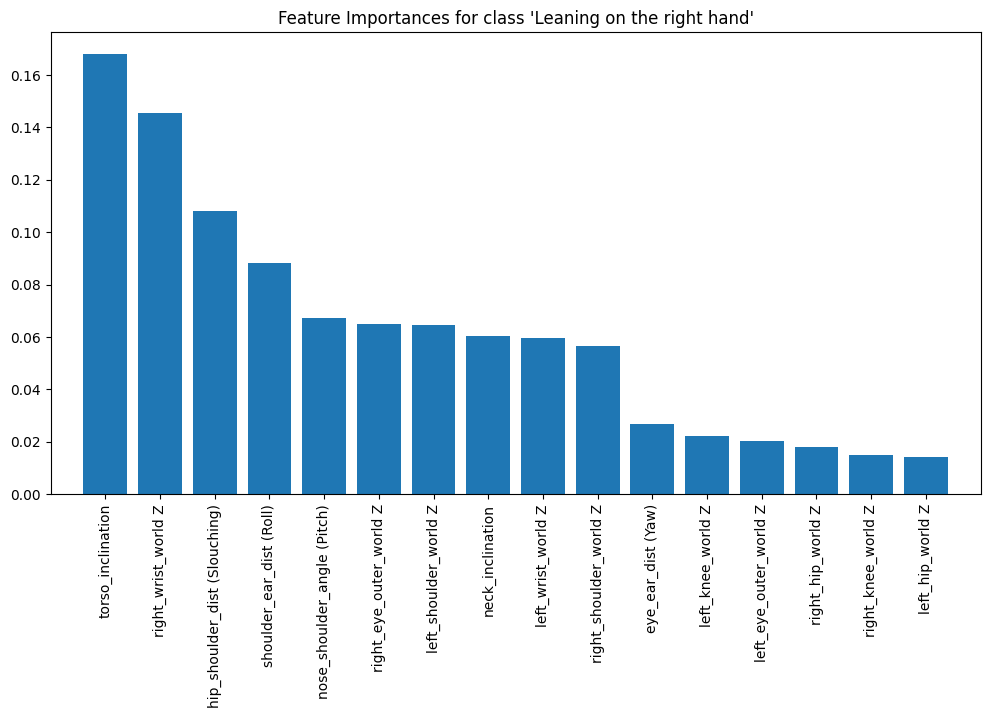

Feature ranking for class 'Slouching down in the chair':
1. feature 13 (0.1979347731397406) - shoulder_ear_dist (Roll)
2. feature 1 (0.17090609339073953) - torso_inclination
3. feature 14 (0.16029248441625524) - nose_shoulder_angle (Pitch)
4. feature 5 (0.09144259630822207) - right_eye_outer_world Z
5. feature 6 (0.0644993403363812) - left_eye_outer_world Z
6. feature 8 (0.0629063371101109) - left_wrist_world Z
7. feature 3 (0.0517247593092916) - right_shoulder_world Z
8. feature 2 (0.04342813773200795) - hip_shoulder_dist (Slouching)
9. feature 11 (0.04261585144307567) - right_knee_world Z
10. feature 4 (0.028569149656896987) - left_shoulder_world Z
11. feature 10 (0.023820549539339306) - left_hip_world Z
12. feature 9 (0.020399583307067804) - right_hip_world Z
13. feature 7 (0.018178567123446492) - right_wrist_world Z
14. feature 0 (0.012509520292965346) - neck_inclination
15. feature 15 (0.008273724593299545) - eye_ear_dist (Yaw)
16. feature 12 (0.0024985323011598674) - left_knee_wo

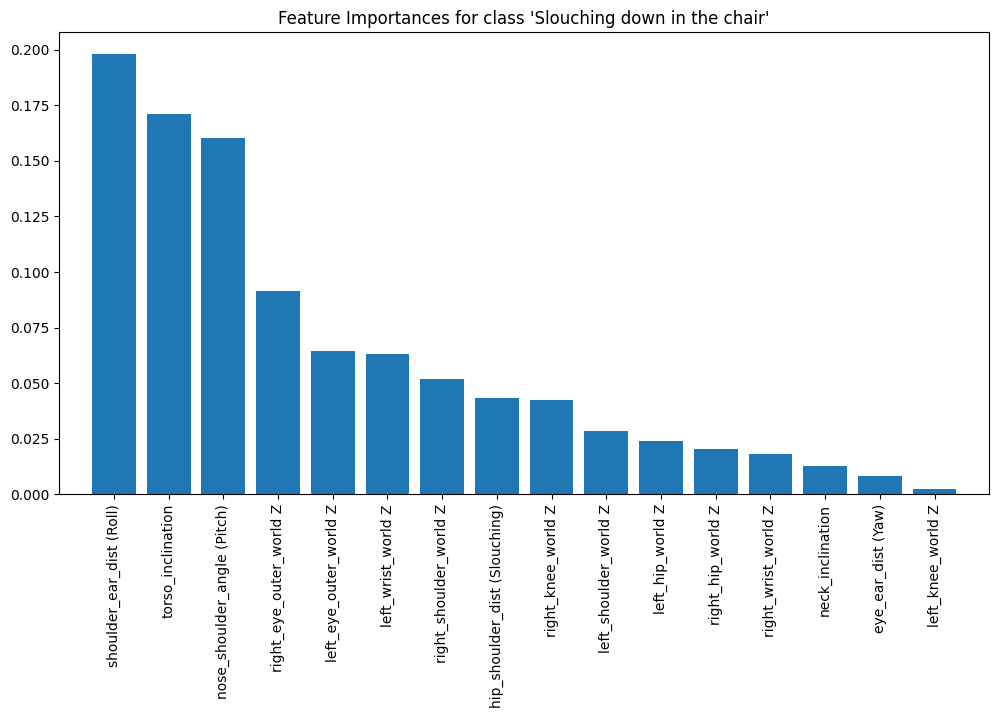

Feature ranking for class 'Extending the head forward':
1. feature 2 (0.12387717628950685) - hip_shoulder_dist (Slouching)
2. feature 0 (0.12310697403141933) - neck_inclination
3. feature 13 (0.09271153395946331) - shoulder_ear_dist (Roll)
4. feature 14 (0.09048378317997369) - nose_shoulder_angle (Pitch)
5. feature 8 (0.08886560645190424) - left_wrist_world Z
6. feature 1 (0.08030559520879735) - torso_inclination
7. feature 6 (0.06902222330526968) - left_eye_outer_world Z
8. feature 5 (0.05962248596688185) - right_eye_outer_world Z
9. feature 4 (0.054144077097592565) - left_shoulder_world Z
10. feature 10 (0.050057380436624846) - left_hip_world Z
11. feature 9 (0.04283440390650682) - right_hip_world Z
12. feature 3 (0.04069993531351926) - right_shoulder_world Z
13. feature 15 (0.03757668232299793) - eye_ear_dist (Yaw)
14. feature 11 (0.02434057668481093) - right_knee_world Z
15. feature 12 (0.01363288804387248) - left_knee_world Z
16. feature 7 (0.008718677800858913) - right_wrist_worl

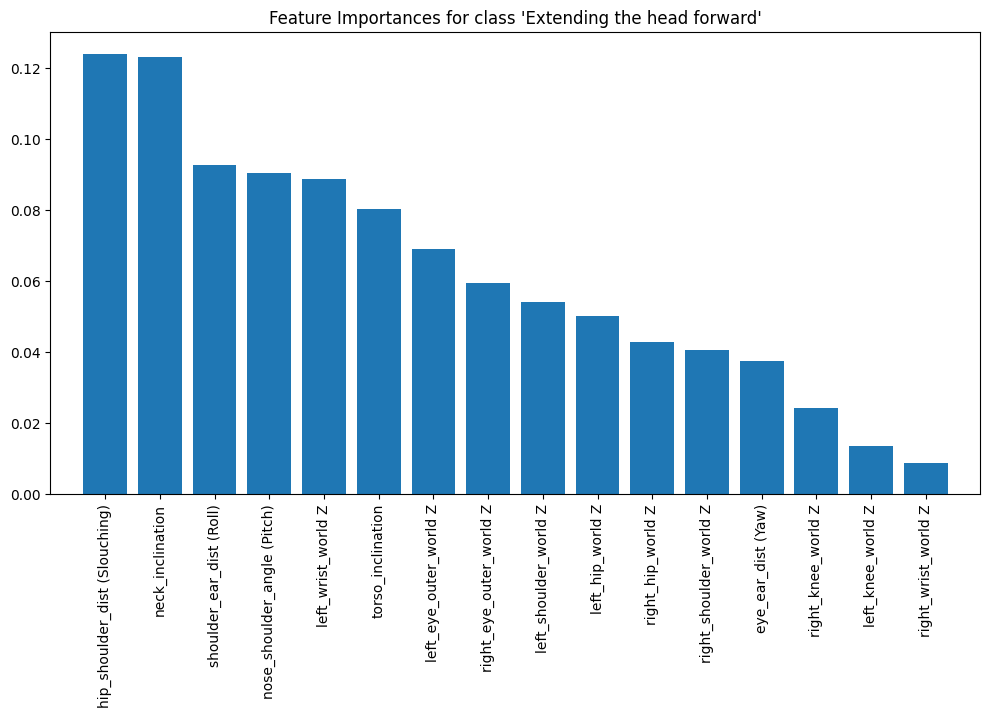

Feature ranking for class 'Slouching':
1. feature 14 (0.1333563176012907) - nose_shoulder_angle (Pitch)
2. feature 2 (0.12265456948052146) - hip_shoulder_dist (Slouching)
3. feature 0 (0.1076220341523742) - neck_inclination
4. feature 15 (0.08282953027706982) - eye_ear_dist (Yaw)
5. feature 12 (0.07718852089182754) - left_knee_world Z
6. feature 1 (0.07066459812361355) - torso_inclination
7. feature 8 (0.06592808050391033) - left_wrist_world Z
8. feature 5 (0.05442183705634731) - right_eye_outer_world Z
9. feature 13 (0.044337131644994) - shoulder_ear_dist (Roll)
10. feature 4 (0.04186516982721642) - left_shoulder_world Z
11. feature 10 (0.04150888828961681) - left_hip_world Z
12. feature 9 (0.03893712245869894) - right_hip_world Z
13. feature 7 (0.03434177216525081) - right_wrist_world Z
14. feature 6 (0.029709959717025232) - left_eye_outer_world Z
15. feature 3 (0.028945552120634942) - right_shoulder_world Z
16. feature 11 (0.02568891568960792) - right_knee_world Z


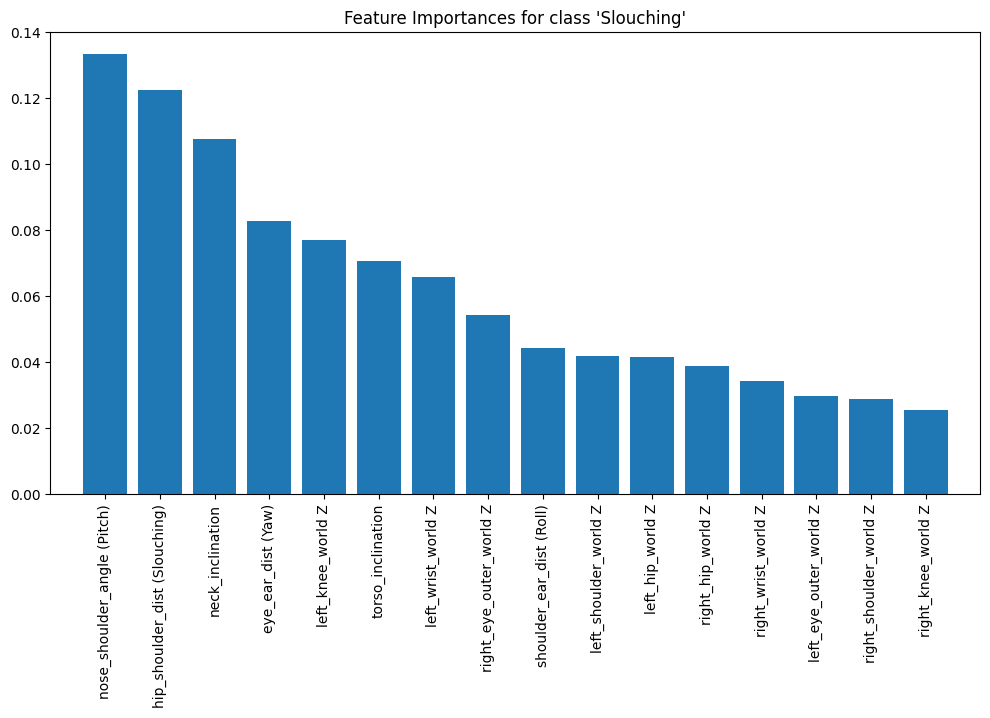

Feature ranking for class 'Writing on paper':
1. feature 14 (0.18231596829870217) - nose_shoulder_angle (Pitch)
2. feature 13 (0.13366513311689715) - shoulder_ear_dist (Roll)
3. feature 10 (0.10792500683158165) - left_hip_world Z
4. feature 0 (0.08670893199704131) - neck_inclination
5. feature 15 (0.08284628510281103) - eye_ear_dist (Yaw)
6. feature 1 (0.08282328484446827) - torso_inclination
7. feature 9 (0.060022684891316444) - right_hip_world Z
8. feature 2 (0.04454105630897707) - hip_shoulder_dist (Slouching)
9. feature 12 (0.04173955286794527) - left_knee_world Z
10. feature 5 (0.040888257489990816) - right_eye_outer_world Z
11. feature 4 (0.03930991029593504) - left_shoulder_world Z
12. feature 3 (0.034779808768290725) - right_shoulder_world Z
13. feature 6 (0.026557427442207734) - left_eye_outer_world Z
14. feature 8 (0.021619979743373242) - left_wrist_world Z
15. feature 7 (0.007345230394156005) - right_wrist_world Z
16. feature 11 (0.006911481606306154) - right_knee_world Z


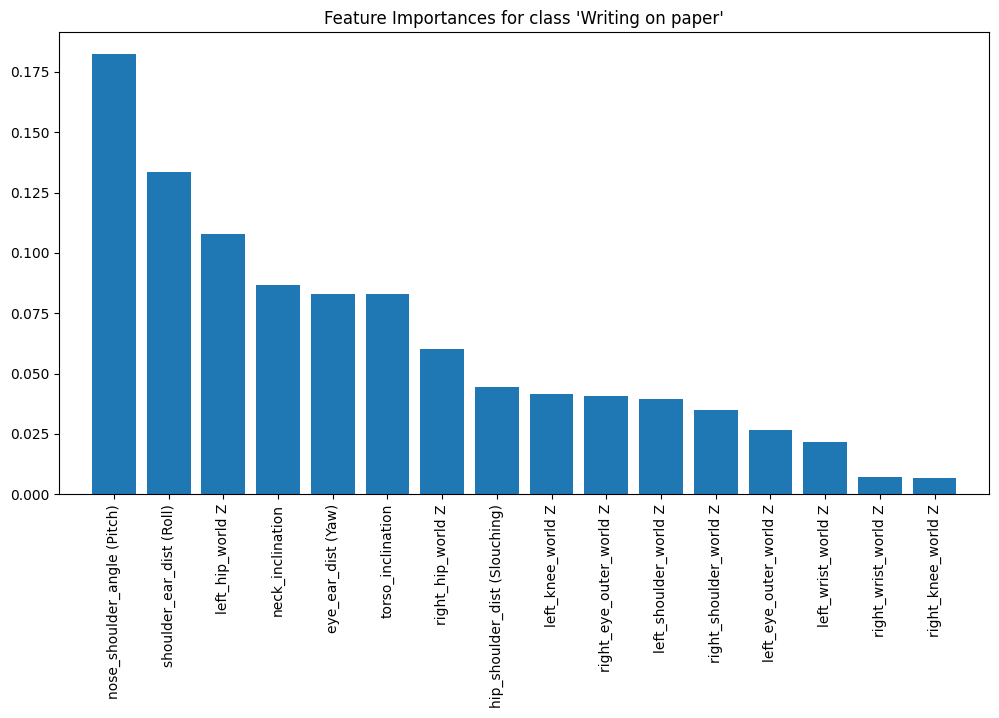

Feature ranking for class 'Sitting at the edge of the chair with legs stretched out':
1. feature 7 (0.19198249253044428) - right_wrist_world Z
2. feature 12 (0.1591454036269912) - left_knee_world Z
3. feature 1 (0.12026399264868028) - torso_inclination
4. feature 10 (0.0918313256170546) - left_hip_world Z
5. feature 5 (0.062275646039742026) - right_eye_outer_world Z
6. feature 0 (0.057116504032758586) - neck_inclination
7. feature 2 (0.056604222186498375) - hip_shoulder_dist (Slouching)
8. feature 9 (0.042523846264966865) - right_hip_world Z
9. feature 6 (0.03356096186813646) - left_eye_outer_world Z
10. feature 3 (0.03341716229873692) - right_shoulder_world Z
11. feature 15 (0.03333528248071614) - eye_ear_dist (Yaw)
12. feature 13 (0.0332367128163851) - shoulder_ear_dist (Roll)
13. feature 14 (0.028754159383057608) - nose_shoulder_angle (Pitch)
14. feature 4 (0.02303797700043077) - left_shoulder_world Z
15. feature 8 (0.017872771266710653) - left_wrist_world Z
16. feature 11 (0.015041

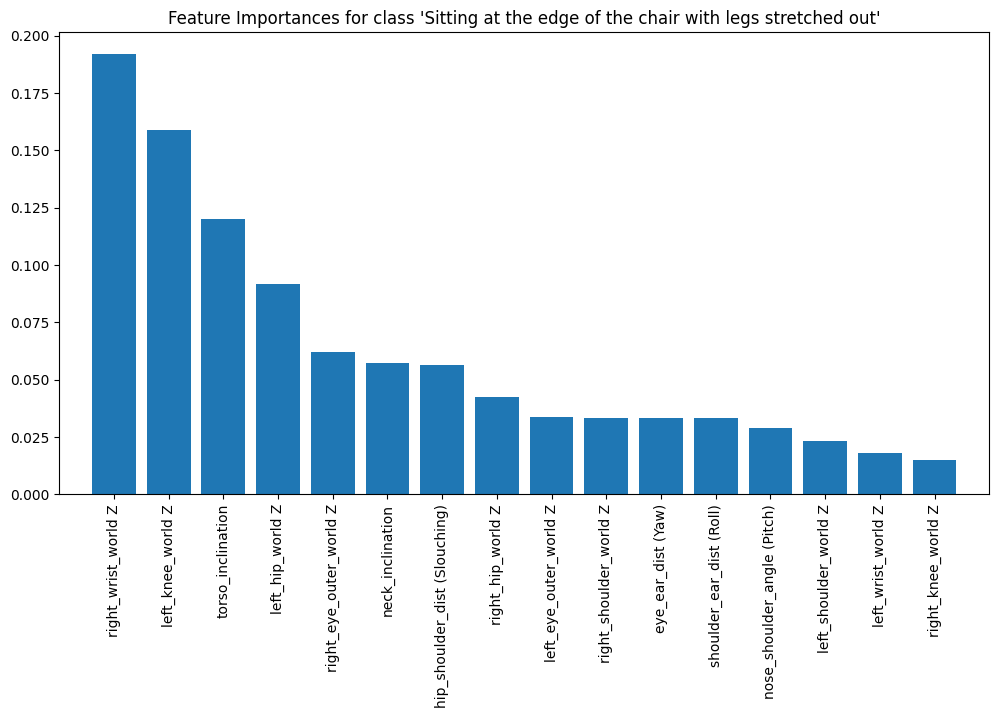

Feature ranking for class 'Sitting on left leg':
1. feature 2 (0.16621525221751732) - hip_shoulder_dist (Slouching)
2. feature 1 (0.16146503023586697) - torso_inclination
3. feature 8 (0.06824458219499223) - left_wrist_world Z
4. feature 14 (0.06701974277501313) - nose_shoulder_angle (Pitch)
5. feature 3 (0.059970350714234705) - right_shoulder_world Z
6. feature 9 (0.05853291493786604) - right_hip_world Z
7. feature 10 (0.05627416563158746) - left_hip_world Z
8. feature 4 (0.0540021129759962) - left_shoulder_world Z
9. feature 6 (0.050509108795403324) - left_eye_outer_world Z
10. feature 15 (0.04745151029549822) - eye_ear_dist (Yaw)
11. feature 0 (0.04287433184897031) - neck_inclination
12. feature 11 (0.04003603179703633) - right_knee_world Z
13. feature 5 (0.039254221723630425) - right_eye_outer_world Z
14. feature 12 (0.03799176019768335) - left_knee_world Z
15. feature 13 (0.035597740773073365) - shoulder_ear_dist (Roll)
16. feature 7 (0.014561142885630587) - right_wrist_world Z


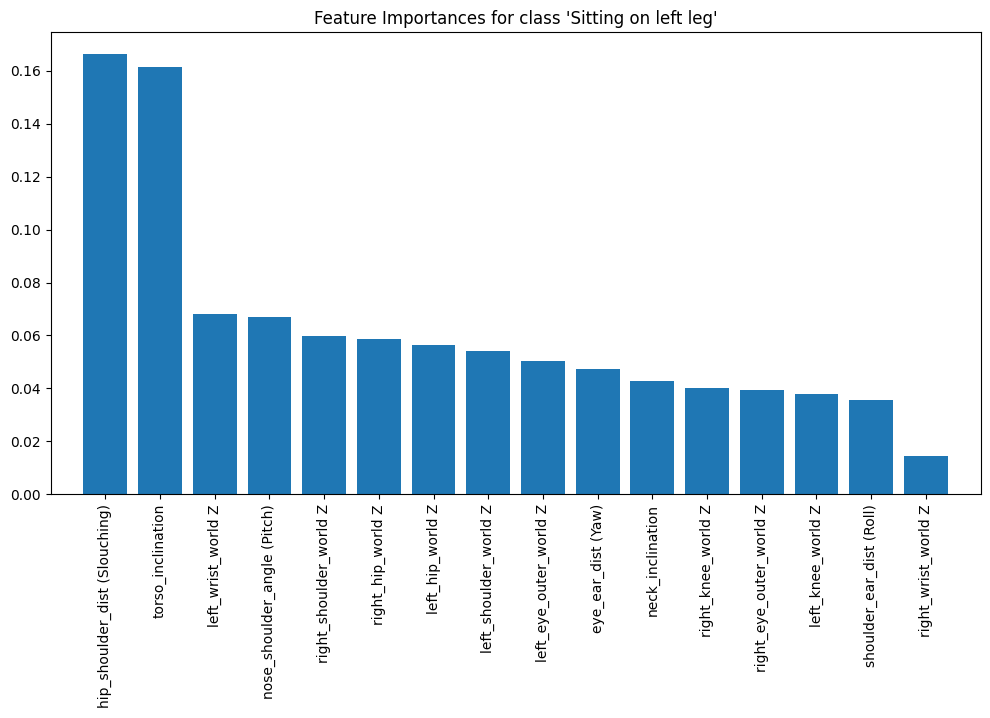

Feature ranking for class 'Sitting on right leg':
1. feature 2 (0.3929045456268706) - hip_shoulder_dist (Slouching)
2. feature 8 (0.09462063472874015) - left_wrist_world Z
3. feature 12 (0.07796717953774547) - left_knee_world Z
4. feature 0 (0.06092587592770924) - neck_inclination
5. feature 14 (0.05980681490939684) - nose_shoulder_angle (Pitch)
6. feature 6 (0.04663985288792723) - left_eye_outer_world Z
7. feature 3 (0.04554670828603427) - right_shoulder_world Z
8. feature 5 (0.040507760098575284) - right_eye_outer_world Z
9. feature 4 (0.035876098934015596) - left_shoulder_world Z
10. feature 1 (0.032413675368897193) - torso_inclination
11. feature 11 (0.023740125010951397) - right_knee_world Z
12. feature 9 (0.022815888281648978) - right_hip_world Z
13. feature 13 (0.01848936104237429) - shoulder_ear_dist (Roll)
14. feature 15 (0.016398691535508922) - eye_ear_dist (Yaw)
15. feature 10 (0.0162169197535664) - left_hip_world Z
16. feature 7 (0.015129868070038164) - right_wrist_world Z


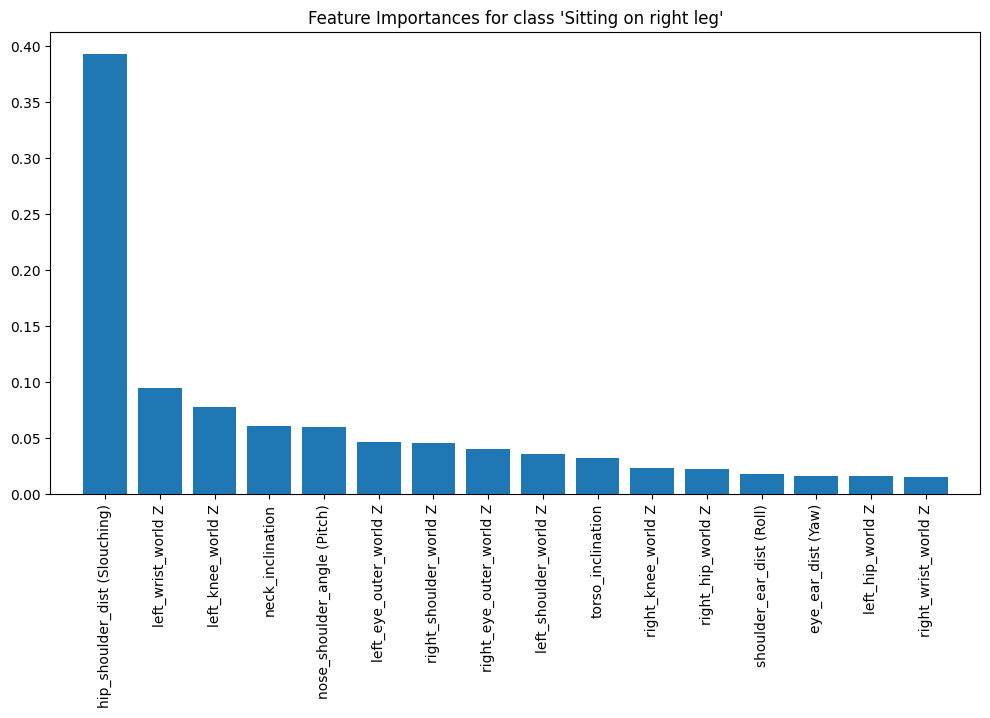

In [98]:
# Initialize and train the One-vs-Rest Random Forest model
ovr_model = OneVsRestClassifier(rf_model_2)
ovr_model.fit(M_train, n_train)

# Loop through each class and print the feature importances
for class_index, class_name in enumerate(class_names):
    specific_rf_model_2 = ovr_model.estimators_[class_index]

    # Compute feature importances for the specific class
    feature_importances_2 = specific_rf_model_2.feature_importances_

    # Sort the features by importance
    indices_2 = np.argsort(feature_importances_2)[::-1]

    print(f"Feature ranking for class '{class_name}':")
    for f in range(M_train.shape[1]):
        print(f"{f + 1}. feature {indices_2[f]} ({feature_importances_2[indices_2[f]]}) - {feature_names_2[indices_2[f]]}")

    # Plot the feature importances
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importances for class '{class_name}'")
    plt.bar(range(M_train.shape[1]), feature_importances_2[indices_2], align="center")
    plt.xticks(range(M_train.shape[1]), [feature_names_2[i] for i in indices_2], rotation=90)
    plt.xlim([-1, M_train.shape[1]])
    plt.show()